# NIDHI NIGAM

Data_Set shape: rows 2584 & columns 9


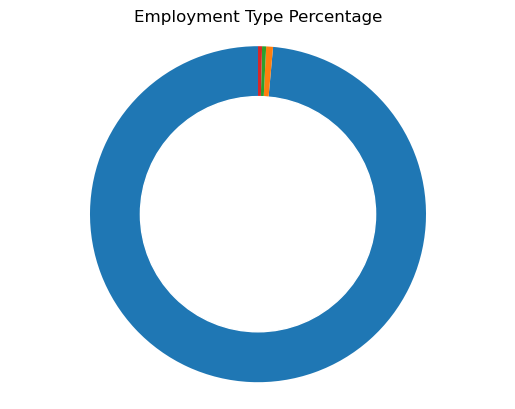

In [105]:
# Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st        
import numpy as np
import statistics as stat


#Reading the Data Set
df=pd.read_csv("./ds_salaries.csv")
df.head()

# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

#Checking for null values
df.isna().sum()

#Find duplicate rows
duplicate_rows = df[df.duplicated()]
#Remove duplicate rows
df = df.drop_duplicates()
df

#dropiing the same information column for salary
df=df.drop(['salary','salary_currency'], axis=1)

#renaming employment types 
df['employment_type']=df['employment_type'].replace("FT", "Full-time")
df['employment_type']=df['employment_type'].replace("PT", "Part-time")
df['employment_type']=df['employment_type'].replace("CT", "Contractual")
df['employment_type']=df['employment_type'].replace("FL", "Freelancer")

#renaming company size
df['company_size']=df['company_size'].replace("L", "Large")
df['company_size']=df['company_size'].replace("M", "Medium")
df['company_size']=df['company_size'].replace("S", "Small")

df.head()

df.to_csv("output_data_NN/salaries.csv")

#Finding the number of rows and column of Data set
a, b = df.shape
print("Data_Set shape: rows {} & columns {}".format(a, b))

#df.info()

#df.describe()



# UNIVARIANT ANALYSIS


# Employment_Type (Univariant Analysis)
employment_type = df["employment_type"].value_counts()


counts = [2547, 17, 10, 10]

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(counts,  startangle=90)

# Draw a white circle in the middle to create the donut effect
circle = plt.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.title('Employment Type Percentage')



# Saving Plot to output_data_NN

plt.savefig("output_data_NN/Fig1_employtype.png")
plt.show()


# ANALYSIS - After the univariant analysis of this dataset for the employment type,the conclusion can be that 98.56% of Data Science Jobs
#falls in to Full Time employemnet type.





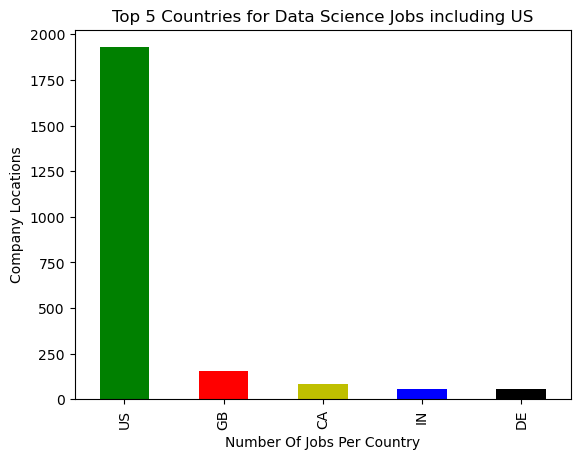

In [106]:
# company_location (Univariant Analysis)

#Top 5 company loations (including US)

company_locations_counts=df["company_location"].value_counts()
top5_company_locations_us= company_locations_counts.head(5)

top5_company_locations_us.plot(
    kind="bar",
    color=["g","r","y","b","k"],
    title="Top 5 Countries for Data Science Jobs including US",
    xlabel = "Number Of Jobs Per Country", 
    ylabel ="Company Locations",

)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs.png")
plt.show()



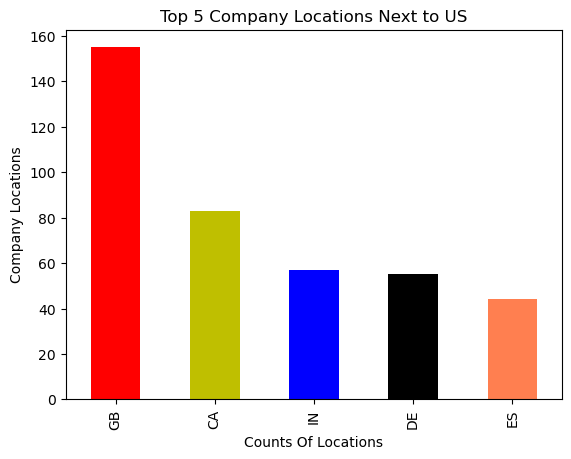

In [110]:
#Top 5 company loations (Excluding US)

new_df = df[df["company_location"]!= "US"]
new_df
company_location_counts = new_df["company_location"].value_counts()
top5_company_location = company_location_counts.head()
top5_company_location.plot(
    kind="bar",
    color=["r","y","b","k","coral"],
    title="Top 5 Company Locations Next to US",
    xlabel = "Counts Of Locations", 
    ylabel ="Company Locations",
    
)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig2_complocs_noUS.png")
plt.show()



#ANALYSIS - #After looking in to the univariant anlysis, We may see that the companies located in USA 
#is already hosting more than 90% jobs. If we remove the USA from the anaysis, The next five countries for stake 
#holders to experience a good competition, will be Great Britain, Canada, India , Germany and Spain. 


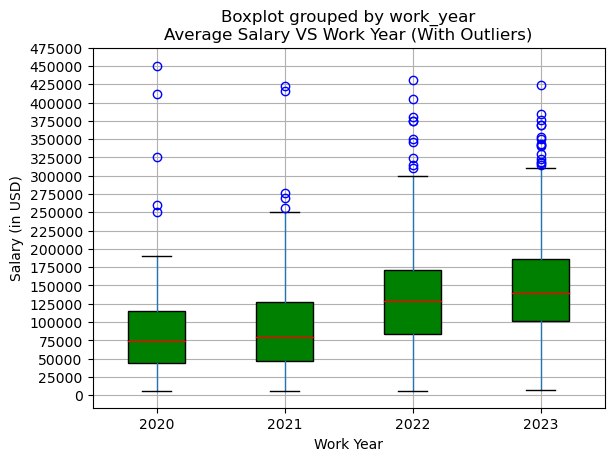

In [86]:
# Pair Plotting or Bivariant Analysis


# Salary vs. Experience Level
a="blue"
b="red"
c="green"

df.boxplot(
    column=["salary_in_usd"], 
    by=["work_year"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary VS Work Year (With Outliers)')
plt.xlabel('Work Year')
plt.ylabel('Salary (in USD)')


y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_outliers.png")

plt.show()




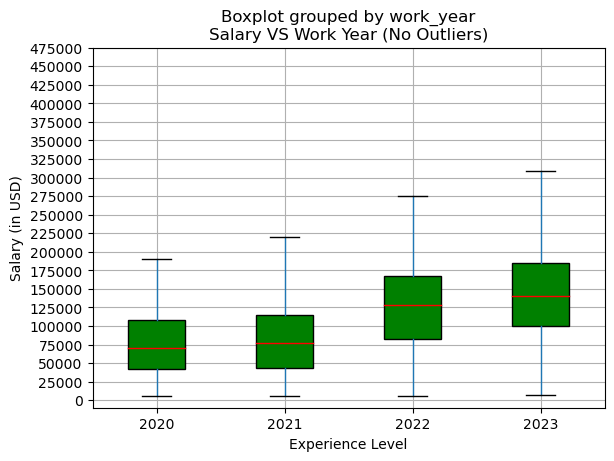

In [111]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outlier1=df[(df["salary_in_usd"]<250000)&(df["work_year"]==2020)]
df_remove_outlier2=df[(df["salary_in_usd"]<225000)&(df["work_year"]==2021)]
df_remove_outlier3=df[(df["salary_in_usd"]<295000)&(df["work_year"]==2022)]
df_remove_outlier4=df[(df["salary_in_usd"]<310000)&(df["work_year"]==2023)]
# dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
dataframes = [df_remove_outlier1,df_remove_outlier2, df_remove_outlier3, df_remove_outlier4]
final_df_remove_outlier = pd.concat(dataframes)  #pd.concat(dataframes)
pd.set_option('display.max_rows', None)
#final_df_remove_outlier


a="blue"
b="red"
c="green"
final_df_remove_outlier.boxplot(column=["salary_in_usd"], by=["work_year"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))



plt.title('Salary VS Work Year (No Outliers)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig3_salary_workyear_nooutliers.png")
plt.show()

# ANALYSIS - This data do have a lot of outliers and median salry levels drop significantly after removing outliers But with
#or with out outliers after comparing the box plot we can deduce that median salaries were almost same in year 
#2020 and 2021 however in year 2022 and 2023 it got a substantial increase.

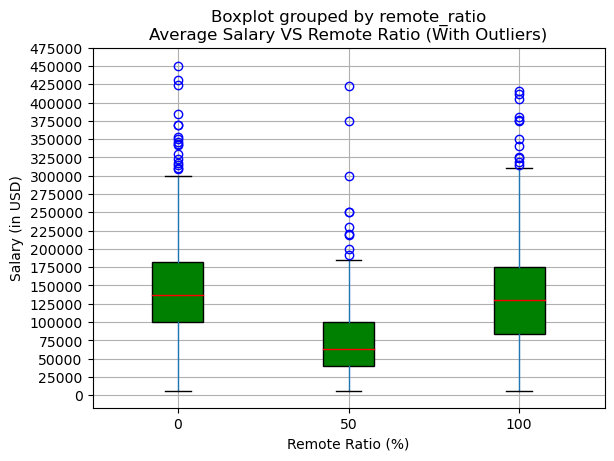

In [116]:
# Salary vs. Experience Level
a="blue"
b="red"
c="green"
df.boxplot(
    column=["salary_in_usd"], 
    by=["remote_ratio"], 
    patch_artist=True, 
    boxprops=dict(facecolor=c), 
    flierprops=dict(color=a, markeredgecolor=a), 
    medianprops=dict(color=b)
)
plt.title('Average Salary VS Remote Ratio (With Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')

y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)

# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_outliers.png")
plt.show()



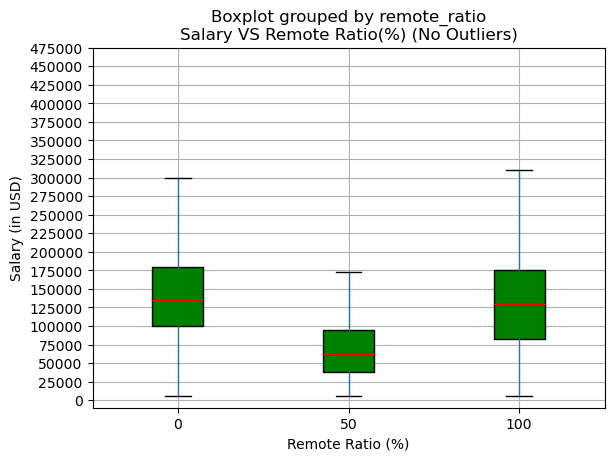

In [115]:
# Removing outliers in salary_in_usd for different categories of experience_level: Salary vs. Experience Level 


df_remove_outliera=df[(df["salary_in_usd"]<300000)&(df["remote_ratio"]==0)]
df_remove_outlierb=df[(df["salary_in_usd"]<185000)&(df["remote_ratio"]==50)]
df_remove_outlierc=df[(df["salary_in_usd"]<315000)&(df["remote_ratio"]==100)]

dataframes = [df_remove_outliera,df_remove_outlierb, df_remove_outlierc]
final_df_remove_outlierr =pd.concat(dataframes)
pd.set_option('display.max_rows', None)
#final_df_remove_outlierr


a="blue"
b="red"
c="green"
final_df_remove_outlierr.boxplot(column=["salary_in_usd"], by=["remote_ratio"], patch_artist=True, boxprops=dict(facecolor=c), flierprops=dict(color=a, markeredgecolor=a), medianprops=dict(color=b))
plt.title('Salary VS Remote Ratio(%) (No Outliers)')
plt.xlabel('Remote Ratio (%)')
plt.ylabel('Salary (in USD)')


y_ticks = np.arange(0, 500000, 25000)  
plt.yticks(y_ticks)
# Saving Plot to output_data_NN
plt.savefig("output_data_NN/Fig4_salary_remoteratio_nooutliers.png")
plt.show()


# ANALYSIS - Same as in the previous case this data also have a lot of outliers and median salry levels drop significantly 
#after removing outliers But with or with out outliers after comparing the box plot we can deduce that median 
#salaries were sustantially less for the hybrid model as compared to fully remote or in office work model.


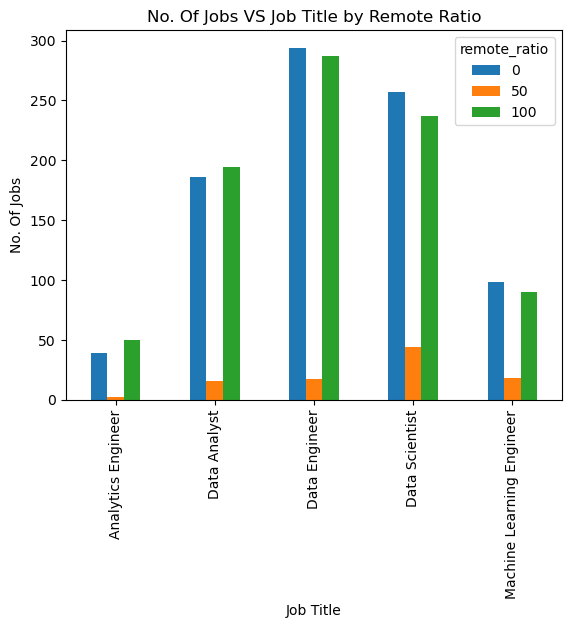

In [114]:
# JOB TITLE VS REMOTE RATIO

reduced_dataframe=df.groupby(["job_title"]).remote_ratio.value_counts().reset_index(name="no_of_jobs")
largest_five_residence_series=reduced_dataframe.groupby(["job_title"])["no_of_jobs"].sum().nlargest(5)
making_dataframe=largest_five_residence_series.to_frame().reset_index()
final_dataframe_largefive_residence = reduced_dataframe[reduced_dataframe["job_title"].isin(making_dataframe["job_title"])]
pivot_dataframe_plotting=final_dataframe_largefive_residence.pivot(index="job_title", columns ="remote_ratio", values= "no_of_jobs")
pivot_dataframe_plotting.plot(kind="bar")
plt.title('No. Of Jobs VS Job Title by Remote Ratio')
plt.xlabel('Job Title')
plt.ylabel('No. Of Jobs')
plt.show()

#ANALYSIS- We can easily analyze from the plot that for every job title, Hybrid model was not favourable how ever fully 
#remote or full in office work model are preferable by companies.


